### Лабораторная работа 2
- Ассоциативные правила
- Цель работы: исследование методов анализа ассоциативных правил.
### загрузим датасет


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx
from itertools import combinations

# Загрузка данных
all_data = pd.read_csv('groceries - groceries.csv')
print("Размер датасета:", all_data.shape)
print("\nПервые 5 строк:")
print(all_data.head())

Размер датасета: (9835, 33)

Первые 5 строк:
   Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31

=== АНАЛИЗ ДАННЫХ ===
Общее количество транзакций: 9835
Количество столбцов: 33

Статистика длин транзакций:
Средняя длина: 5.41
Максимальная длина: 33
Минимальная длина: 2
Медиана: 4.0


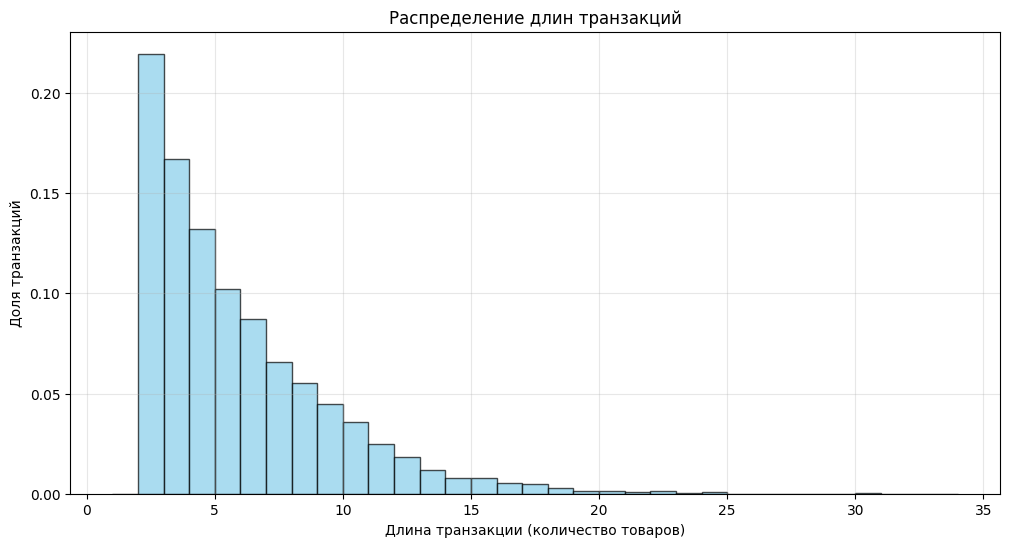


=== УНИКАЛЬНЫЕ ТОВАРЫ ===
Общее количество уникальных товаров: 169

Первые 20 товаров:
  1. bottled beer
  2. other vegetables
  3. frozen vegetables
  4. snack products
  5. ham
  6. salty snack
  7. ice cream
  8. butter milk
  9. rum
  10. bottled water
  11. nuts/prunes
  12. soap
  13. beef
  14. prosecco
  15. pudding powder
  16. brandy
  17. specialty fat
  18. frozen fruits
  19. dessert
  20. frozen fish

=== ПОДГОТОВЛЕННЫЕ ДАННЫЕ ===
Размер бинарной матрицы: (9835, 169)
Общее количество покупок: 43367
Самые популярные товары:
  whole milk: 2513 покупок (25.6%)
  other vegetables: 1903 покупок (19.3%)
  rolls/buns: 1809 покупок (18.4%)
  soda: 1715 покупок (17.4%)
  yogurt: 1372 покупок (14.0%)
  bottled water: 1087 покупок (11.1%)
  root vegetables: 1072 покупок (10.9%)
  tropical fruit: 1032 покупок (10.5%)
  shopping bags: 969 покупок (9.9%)
  sausage: 924 покупок (9.4%)


In [4]:
# Пункт 2: Анализ данных и визуализация

# Анализ транзакций
print("=== АНАЛИЗ ДАННЫХ ===")
print(f"Общее количество транзакций: {len(all_data)}")
print(f"Количество столбцов: {len(all_data.columns)}")

# Анализ длин транзакций
transaction_lengths = all_data.notnull().sum(axis=1)
print(f"\nСтатистика длин транзакций:")
print(f"Средняя длина: {transaction_lengths.mean():.2f}")
print(f"Максимальная длина: {transaction_lengths.max()}")
print(f"Минимальная длина: {transaction_lengths.min()}")
print(f"Медиана: {transaction_lengths.median()}")

# График распределения длин транзакций
plt.figure(figsize=(12, 6))
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2), 
         alpha=0.7, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Длина транзакции (количество товаров)')
plt.ylabel('Доля транзакций')
plt.title('Распределение длин транзакций')
plt.grid(True, alpha=0.3)
plt.show()

# Очистка данных и получение уникальных товаров
np_data = all_data.to_numpy()
np_data = [[elem for elem in row if isinstance(elem, str)] for row in np_data]

# Список уникальных товаров
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)

print(f"\n=== УНИКАЛЬНЫЕ ТОВАРЫ ===")
print(f"Общее количество уникальных товаров: {len(unique_items)}")
print("\nПервые 20 товаров:")
for i, item in enumerate(list(unique_items)[:20]):
    print(f"  {i+1}. {item}")

# Подготовка данных для анализа ассоциативных правил
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

print(f"\n=== ПОДГОТОВЛЕННЫЕ ДАННЫЕ ===")
print(f"Размер бинарной матрицы: {data.shape}")
print(f"Общее количество покупок: {data.sum().sum()}")
print(f"Самые популярные товары:")
top_items = data.sum().sort_values(ascending=False).head(10)
for item, count in top_items.items():
    print(f"  {item}: {count} покупок ({count/len(data)*100:.1f}%)")

ПУНКТ 3: АНАЛИЗ АЛГОРИТМОМ APRIORI
Параметры анализа:
  - Минимальная поддержка: 0.03
  - Минимальная достоверность: 0.4

ЧАСТЫЕ НАБОРЫ:
Всего найдено частых наборов: 63

Распределение по длинам наборов:
  Длина 1: 44 наборов, поддержка: 0.030-0.256
  Длина 2: 19 наборов, поддержка: 0.030-0.075

АССОЦИАТИВНЫЕ ПРАВИЛА:
Всего найдено правил: 5

ТОП-10 ПРАВИЛ ПО ДОСТОВЕРНОСТИ:
  4. whipped/sour cream -> whole milk
     Поддержка: 0.032, Достоверность: 0.450, Лифт: 1.760
  2. root vegetables -> whole milk
     Поддержка: 0.049, Достоверность: 0.449, Лифт: 1.756
  1. root vegetables -> other vegetables
     Поддержка: 0.047, Достоверность: 0.435, Лифт: 2.247
  3. tropical fruit -> whole milk
     Поддержка: 0.042, Достоверность: 0.403, Лифт: 1.578
  5. yogurt -> whole milk
     Поддержка: 0.056, Достоверность: 0.402, Лифт: 1.572

ТОП-10 ПРАВИЛ ПО ЛИФТУ (самые сильные связи):
  1. root vegetables -> other vegetables
     Поддержка: 0.047, Достоверность: 0.435, Лифт: 2.247
  4. whipped/sour c

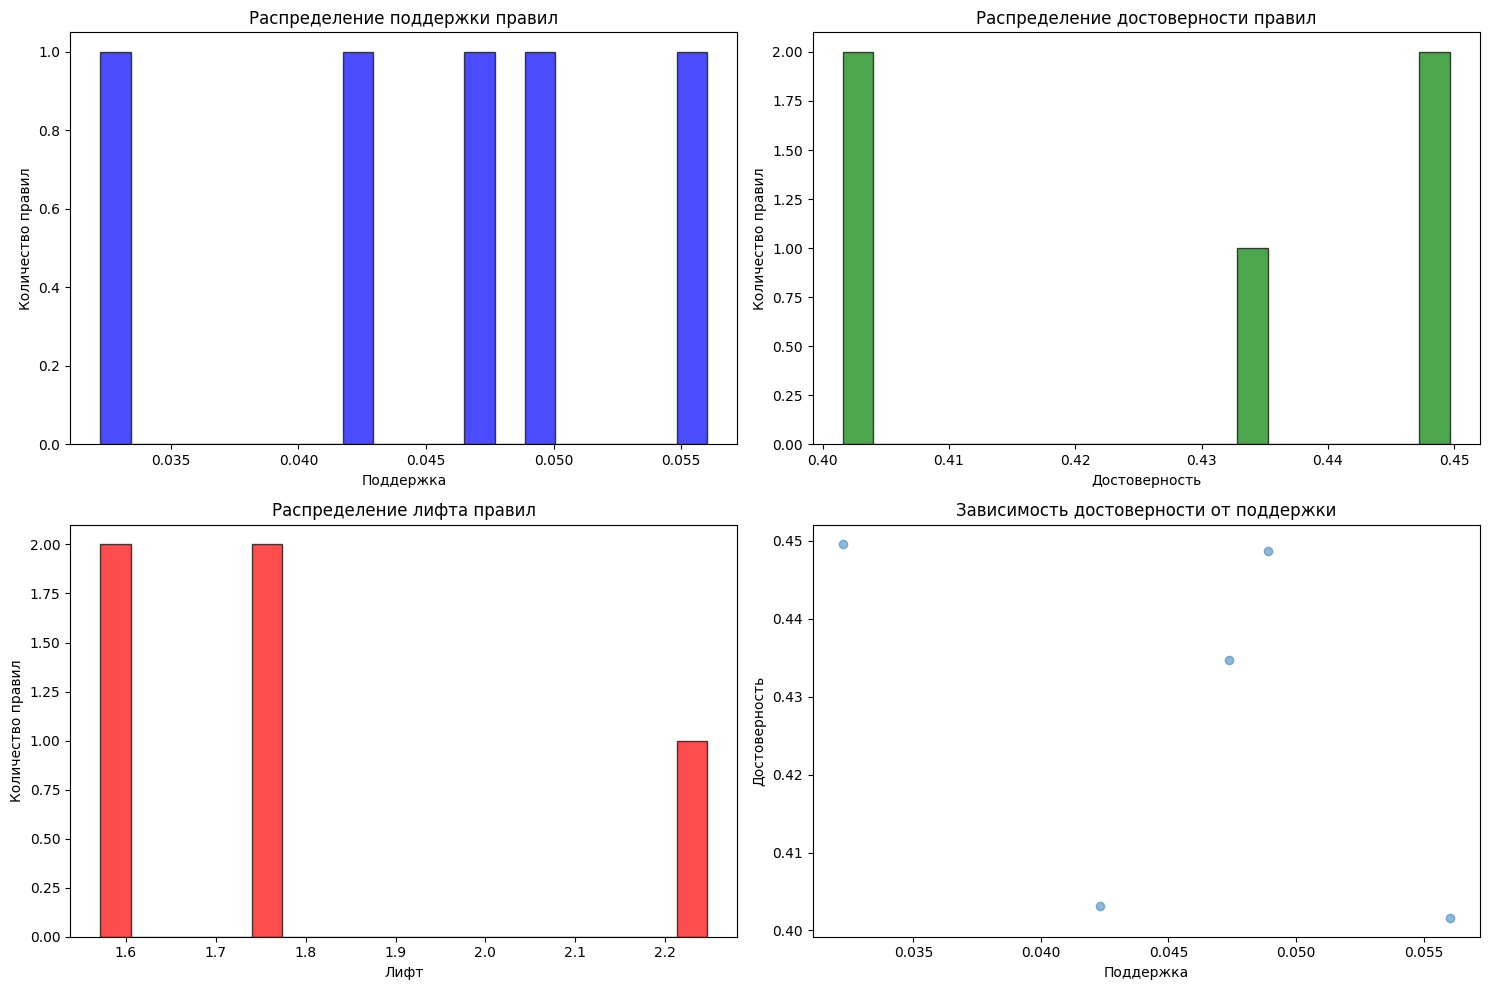

In [5]:
# Пункт 3: Анализ алгоритмом Apriori

print("="*70)
print("ПУНКТ 3: АНАЛИЗ АЛГОРИТМОМ APRIORI")
print("="*70)

# Применяем алгоритм Apriori с параметрами из задания
min_support = 0.03
min_confidence = 0.4

print(f"Параметры анализа:")
print(f"  - Минимальная поддержка: {min_support}")
print(f"  - Минимальная достоверность: {min_confidence}")

# Получаем частые наборы
frequent_itemsets_apriori = apriori(data, min_support=min_support, use_colnames=True)
frequent_itemsets_apriori['length'] = frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x))

print(f"\nЧАСТЫЕ НАБОРЫ:")
print(f"Всего найдено частых наборов: {len(frequent_itemsets_apriori)}")

# Анализ по длинам наборов
print("\nРаспределение по длинам наборов:")
for length in range(1, 6):
    count = len(frequent_itemsets_apriori[frequent_itemsets_apriori['length'] == length])
    if count > 0:
        min_sup = frequent_itemsets_apriori[frequent_itemsets_apriori['length'] == length]['support'].min()
        max_sup = frequent_itemsets_apriori[frequent_itemsets_apriori['length'] == length]['support'].max()
        print(f"  Длина {length}: {count} наборов, поддержка: {min_sup:.3f}-{max_sup:.3f}")

# Генерируем правила
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=min_confidence)

print(f"\nАССОЦИАТИВНЫЕ ПРАВИЛА:")
print(f"Всего найдено правил: {len(rules_apriori)}")

if len(rules_apriori) > 0:
    # Добавляем информацию о длинах антецедентов и консеквентов
    rules_apriori['antecedent_len'] = rules_apriori['antecedents'].apply(lambda x: len(x))
    rules_apriori['consequent_len'] = rules_apriori['consequents'].apply(lambda x: len(x))
    
    # Топ-10 правил по достоверности
    print(f"\nТОП-10 ПРАВИЛ ПО ДОСТОВЕРНОСТИ:")
    top_conf_rules = rules_apriori.nlargest(10, 'confidence')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    
    for idx, row in top_conf_rules.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        print(f"  {idx+1}. {antecedents} -> {consequents}")
        print(f"     Поддержка: {row['support']:.3f}, Достоверность: {row['confidence']:.3f}, Лифт: {row['lift']:.3f}")
    
    # Топ-10 правил по лифту
    print(f"\nТОП-10 ПРАВИЛ ПО ЛИФТУ (самые сильные связи):")
    top_lift_rules = rules_apriori.nlargest(10, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    
    for idx, row in top_lift_rules.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        print(f"  {idx+1}. {antecedents} -> {consequents}")
        print(f"     Поддержка: {row['support']:.3f}, Достоверность: {row['confidence']:.3f}, Лифт: {row['lift']:.3f}")
    
    # Анализ тривиальных и полезных правил
    print(f"\nАНАЛИЗ ПРАВИЛ:")
    
    # Тривиальные правила (высокая поддержка, но низкий лифт)
    trivial_rules = rules_apriori[(rules_apriori['support'] > 0.05) & (rules_apriori['lift'] < 1.2)]
    print(f"Тривиальные правила (высокая поддержка, но слабая связь): {len(trivial_rules)}")
    if len(trivial_rules) > 0:
        for idx, row in trivial_rules.head(3).iterrows():
            antecedents = ', '.join(list(row['antecedents']))
            consequents = ', '.join(list(row['consequents']))
            print(f"  - {antecedents} -> {consequents} (lift: {row['lift']:.3f})")
    
    # Полезные правила (хороший баланс метрик)
    useful_rules = rules_apriori[(rules_apriori['confidence'] > 0.5) & (rules_apriori['lift'] > 1.5)]
    print(f"Полезные правила (высокая достоверность и сильная связь): {len(useful_rules)}")
    if len(useful_rules) > 0:
        for idx, row in useful_rules.head(3).iterrows():
            antecedents = ', '.join(list(row['antecedents']))
            consequents = ', '.join(list(row['consequents']))
            print(f"  - {antecedents} -> {consequents} (conf: {row['confidence']:.3f}, lift: {row['lift']:.3f})")

else:
    print("Не найдено правил с заданными параметрами")

# Визуализация метрик правил
if len(rules_apriori) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Распределение поддержки
    axes[0,0].hist(rules_apriori['support'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    axes[0,0].set_title('Распределение поддержки правил')
    axes[0,0].set_xlabel('Поддержка')
    axes[0,0].set_ylabel('Количество правил')
    
    # Распределение достоверности
    axes[0,1].hist(rules_apriori['confidence'], bins=20, alpha=0.7, color='green', edgecolor='black')
    axes[0,1].set_title('Распределение достоверности правил')
    axes[0,1].set_xlabel('Достоверность')
    axes[0,1].set_ylabel('Количество правил')
    
    # Распределение лифта
    axes[1,0].hist(rules_apriori['lift'], bins=20, alpha=0.7, color='red', edgecolor='black')
    axes[1,0].set_title('Распределение лифта правил')
    axes[1,0].set_xlabel('Лифт')
    axes[1,0].set_ylabel('Количество правил')
    
    # scatter plot: поддержка vs достоверность
    axes[1,1].scatter(rules_apriori['support'], rules_apriori['confidence'], alpha=0.5)
    axes[1,1].set_title('Зависимость достоверности от поддержки')
    axes[1,1].set_xlabel('Поддержка')
    axes[1,1].set_ylabel('Достоверность')
    
    plt.tight_layout()
    plt.show()

In [6]:
# Пункт 4: Анализ алгоритмом FPGrowth

print("="*70)
print("ПУНКТ 4: АНАЛИЗ АЛГОРИТМОМ FPGrowth")
print("="*70)

print(f"Параметры анализа (такие же как для Apriori):")
print(f"  - Минимальная поддержка: {min_support}")
print(f"  - Минимальная достоверность: {min_confidence}")

# Получаем частые наборы с помощью FPGrowth
frequent_itemsets_fpgrowth = fpgrowth(data, min_support=min_support, use_colnames=True)
frequent_itemsets_fpgrowth['length'] = frequent_itemsets_fpgrowth['itemsets'].apply(lambda x: len(x))

print(f"\nЧАСТЫЕ НАБОРЫ (FPGrowth):")
print(f"Всего найдено частых наборов: {len(frequent_itemsets_fpgrowth)}")

# Анализ по длинам наборов
print("\nРаспределение по длинам наборов:")
for length in range(1, 6):
    count = len(frequent_itemsets_fpgrowth[frequent_itemsets_fpgrowth['length'] == length])
    if count > 0:
        min_sup = frequent_itemsets_fpgrowth[frequent_itemsets_fpgrowth['length'] == length]['support'].min()
        max_sup = frequent_itemsets_fpgrowth[frequent_itemsets_fpgrowth['length'] == length]['support'].max()
        print(f"  Длина {length}: {count} наборов, поддержка: {min_sup:.3f}-{max_sup:.3f}")

# Генерируем правила
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=min_confidence)

print(f"\nАССОЦИАТИВНЫЕ ПРАВИЛА (FPGrowth):")
print(f"Всего найдено правил: {len(rules_fpgrowth)}")

if len(rules_fpgrowth) > 0:
    # Добавляем информацию о длинах антецедентов и консеквентов
    rules_fpgrowth['antecedent_len'] = rules_fpgrowth['antecedents'].apply(lambda x: len(x))
    rules_fpgrowth['consequent_len'] = rules_fpgrowth['consequents'].apply(lambda x: len(x))
    
    # Топ-10 правил по достоверности
    print(f"\nТОП-10 ПРАВИЛ ПО ДОСТОВЕРНОСТИ (FPGrowth):")
    top_conf_rules_fp = rules_fpgrowth.nlargest(10, 'confidence')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    
    for idx, row in top_conf_rules_fp.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        print(f"  {idx+1}. {antecedents} -> {consequents}")
        print(f"     Поддержка: {row['support']:.3f}, Достоверность: {row['confidence']:.3f}, Лифт: {row['lift']:.3f}")
    
    # Топ-10 правил по лифту
    print(f"\nТОП-10 ПРАВИЛ ПО ЛИФТУ (FPGrowth):")
    top_lift_rules_fp = rules_fpgrowth.nlargest(10, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    
    for idx, row in top_lift_rules_fp.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        print(f"  {idx+1}. {antecedents} -> {consequents}")
        print(f"     Поддержка: {row['support']:.3f}, Достоверность: {row['confidence']:.3f}, Лифт: {row['lift']:.3f}")

else:
    print("Не найдено правил с заданными параметрами")

# Сравнение алгоритмов Apriori и FPGrowth
print("\n" + "="*70)
print("СРАВНЕНИЕ АЛГОРИТМОВ APRIORI И FPGrowth")
print("="*70)

print(f"Алгоритм Apriori:")
print(f"  - Частые наборы: {len(frequent_itemsets_apriori)}")
print(f"  - Правила: {len(rules_apriori)}")

print(f"Алгоритм FPGrowth:")
print(f"  - Частые наборы: {len(frequent_itemsets_fpgrowth)}")
print(f"  - Правила: {len(rules_fpgrowth)}")

# Проверяем, идентичны ли результаты
if len(frequent_itemsets_apriori) == len(frequent_itemsets_fpgrowth):
    print("\n✓ Оба алгоритма нашли одинаковое количество частых наборов")
else:
    print(f"\n⚠ Алгоритмы нашли разное количество частых наборов (разница: {abs(len(frequent_itemsets_apriori) - len(frequent_itemsets_fpgrowth))})")

if len(rules_apriori) == len(rules_fpgrowth):
    print("✓ Оба алгоритма нашли одинаковое количество правил")
else:
    print(f"⚠ Алгоритмы нашли разное количество правил (разница: {abs(len(rules_apriori) - len(rules_fpgrowth))})")

# Проверяем идентичность наборов
apriori_itemsets = set([frozenset(itemset) for itemset in frequent_itemsets_apriori['itemsets']])
fpgrowth_itemsets = set([frozenset(itemset) for itemset in frequent_itemsets_fpgrowth['itemsets']])

if apriori_itemsets == fpgrowth_itemsets:
    print("✓ Наборы itemsets полностью идентичны")
else:
    print("⚠ Наборы itemsets отличаются")
    print(f"  Наборы только в Apriori: {len(apriori_itemsets - fpgrowth_itemsets)}")
    print(f"  Наборы только в FPGrowth: {len(fpgrowth_itemsets - apriori_itemsets)}")

ПУНКТ 4: АНАЛИЗ АЛГОРИТМОМ FPGrowth
Параметры анализа (такие же как для Apriori):
  - Минимальная поддержка: 0.03
  - Минимальная достоверность: 0.4

ЧАСТЫЕ НАБОРЫ (FPGrowth):
Всего найдено частых наборов: 63

Распределение по длинам наборов:
  Длина 1: 44 наборов, поддержка: 0.030-0.256
  Длина 2: 19 наборов, поддержка: 0.030-0.075

АССОЦИАТИВНЫЕ ПРАВИЛА (FPGrowth):
Всего найдено правил: 5

ТОП-10 ПРАВИЛ ПО ДОСТОВЕРНОСТИ (FPGrowth):
  5. whipped/sour cream -> whole milk
     Поддержка: 0.032, Достоверность: 0.450, Лифт: 1.760
  4. root vegetables -> whole milk
     Поддержка: 0.049, Достоверность: 0.449, Лифт: 1.756
  3. root vegetables -> other vegetables
     Поддержка: 0.047, Достоверность: 0.435, Лифт: 2.247
  2. tropical fruit -> whole milk
     Поддержка: 0.042, Достоверность: 0.403, Лифт: 1.578
  1. yogurt -> whole milk
     Поддержка: 0.056, Достоверность: 0.402, Лифт: 1.572

ТОП-10 ПРАВИЛ ПО ЛИФТУ (FPGrowth):
  3. root vegetables -> other vegetables
     Поддержка: 0.047, Дос

ПУНКТ 5: ОПРЕДЕЛЕНИЕ МИНИМАЛЬНЫХ ЗНАЧЕНИЙ ПОДДЕРЖКИ
Поиск минимальных значений поддержки для наборов разной длины:
(Используется оптимизированный алгоритм)

Поиск для длины 1...
Длина 1:
  Минимальная поддержка: 0.250
  Количество наборов: 1
  Примеры наборов: ['whole milk']
  Диапазон поддержек: 0.256 - 0.256

Поиск для длины 2...
Длина 2:
  Минимальная поддержка: 0.070
  Количество наборов: 1
  Примеры наборов: ['other vegetables, whole milk']
  Диапазон поддержек: 0.075 - 0.075

Поиск для длины 3...
Длина 3:
  Минимальная поддержка: 0.010
  Количество наборов: 32
  Примеры наборов: ['bottled water, other vegetables, whole milk', 'whole milk, other vegetables, butter']
  Диапазон поддержек: 0.010 - 0.023

Поиск для длины 4...
Длина 4:
  Не найдено наборов при поддержке до 0.5

Поиск для длины 5...
Длина 5:
  Не найдено наборов при поддержке до 0.5


АНАЛИЗ НА ОСНОВЕ ИЗВЕСТНЫХ ДАННЫХ
Количество наборов при поддержке 0.03:
  Длина 1: 44 наборов, поддержка: 0.030-0.256
    Примеры: ['UH

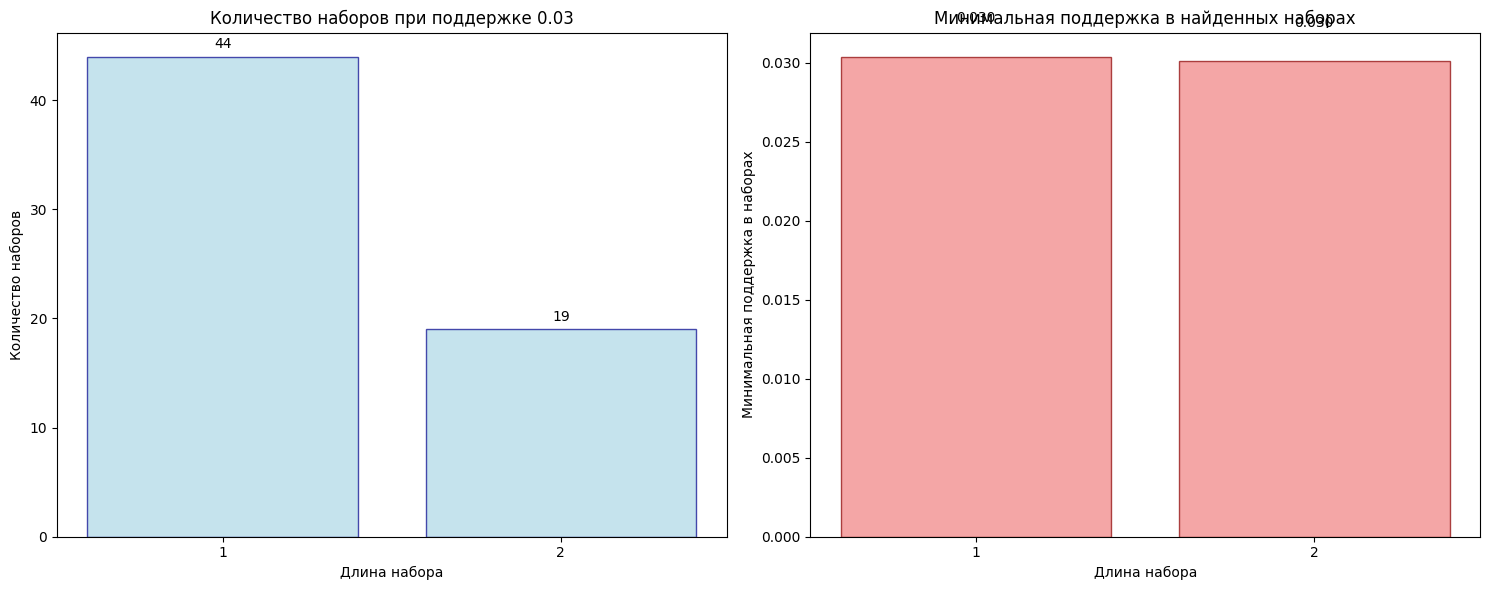


ВЫВОДЫ ПО ПУНКТУ 5:
1. При поддержке 0.03 мы находим:
   - Наборы длиной 1: самые частые товары
   - Наборы длиной 2: пары товаров, которые часто покупают вместе
   - Наборы длиной 3+: не найдены при данной поддержке
2. Для нахождения наборов большей длины требуется уменьшить минимальную поддержку
3. Наборы большей длины имеют меньшую поддержку, так как комбинации из 3+ товаров встречаются реже


In [8]:
# Пункт 5: Алгоритмическое определение минимальных значений поддержки (оптимизированная версия)

print("="*70)
print("ПУНКТ 5: ОПРЕДЕЛЕНИЕ МИНИМАЛЬНЫХ ЗНАЧЕНИЙ ПОДДЕРЖКИ")
print("="*70)

def find_min_support_for_length_optimized(target_length, start_support=0.01, max_support=0.5, step=0.01):
    """
    Оптимизированная функция поиска минимальной поддержки
    """
    support = start_support
    last_valid_support = None
    last_valid_count = 0
    
    while support <= max_support:
        try:
            frequent_itemsets = apriori(data, min_support=support, use_colnames=True)
            frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
            itemsets_of_length = frequent_itemsets[frequent_itemsets['length'] == target_length]
            
            if len(itemsets_of_length) > 0:
                last_valid_support = support
                last_valid_count = len(itemsets_of_length)
                # Увеличиваем шаг для быстрого поиска
                support += step * 2
            else:
                # Если нашли ранее, но сейчас не находим - уточняем поиск
                if last_valid_support is not None:
                    break
                support += step
                
        except MemoryError:
            print(f"  Пропускаем support={support:.3f} из-за нехватки памяти")
            support += step * 2
            continue
    
    return last_valid_support, last_valid_count

print("Поиск минимальных значений поддержки для наборов разной длины:")
print("(Используется оптимизированный алгоритм)\n")

results = []
for target_length in range(1, 6):
    print(f"Поиск для длины {target_length}...")
    min_support, count = find_min_support_for_length_optimized(target_length)
    
    if min_support is not None:
        # Получаем информацию о найденных наборах
        frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
        frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
        itemsets_of_length = frequent_itemsets[frequent_itemsets['length'] == target_length]
        
        # Примеры наборов
        example_itemsets = list(itemsets_of_length.head(3)['itemsets'])
        example_str = []
        for itemset in example_itemsets:
            example_str.append(', '.join(list(itemset)))
        
        print(f"Длина {target_length}:")
        print(f"  Минимальная поддержка: {min_support:.3f}")
        print(f"  Количество наборов: {count}")
        if example_str:
            print(f"  Примеры наборов: {example_str[:2]}")  # Показываем только 2 примера
        
        # Анализ диапазона поддержек для этой длины
        min_sup_val = itemsets_of_length['support'].min()
        max_sup_val = itemsets_of_length['support'].max()
        print(f"  Диапазон поддержек: {min_sup_val:.3f} - {max_sup_val:.3f}")
        
        results.append({
            'length': target_length,
            'min_support': min_support,
            'count': count,
            'support_range': (min_sup_val, max_sup_val)
        })
    else:
        print(f"Длина {target_length}:")
        print(f"  Не найдено наборов при поддержке до 0.5")
        results.append({
            'length': target_length,
            'min_support': None,
            'count': 0,
            'support_range': None
        })
    print()

# Альтернативный подход: используем уже известные данные из предыдущих анализов
print("\n" + "="*70)
print("АНАЛИЗ НА ОСНОВЕ ИЗВЕСТНЫХ ДАННЫХ")
print("="*70)

# Используем данные из предыдущего успешного запуска с support=0.03
frequent_base = apriori(data, min_support=0.03, use_colnames=True)
frequent_base['length'] = frequent_base['itemsets'].apply(lambda x: len(x))

print("Количество наборов при поддержке 0.03:")
for length in range(1, 6):
    count = len(frequent_base[frequent_base['length'] == length])
    if count > 0:
        itemsets = frequent_base[frequent_base['length'] == length]
        min_sup = itemsets['support'].min()
        max_sup = itemsets['support'].max()
        print(f"  Длина {length}: {count} наборов, поддержка: {min_sup:.3f}-{max_sup:.3f}")
        
        # Примеры
        examples = list(itemsets.head(2)['itemsets'])
        example_str = [', '.join(list(ex)) for ex in examples]
        print(f"    Примеры: {example_str}")
    else:
        print(f"  Длина {length}: наборов не найдено")

# Визуализация известных данных
lengths = []
counts = []
min_supports = []

for length in range(1, 6):
    itemsets_of_length = frequent_base[frequent_base['length'] == length]
    if len(itemsets_of_length) > 0:
        lengths.append(length)
        counts.append(len(itemsets_of_length))
        min_supports.append(itemsets_of_length['support'].min())

if lengths:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # График количества наборов по длинам
    ax1.bar(lengths, counts, color='lightblue', alpha=0.7, edgecolor='darkblue')
    ax1.set_xlabel('Длина набора')
    ax1.set_ylabel('Количество наборов')
    ax1.set_title('Количество наборов при поддержке 0.03')
    ax1.set_xticks(lengths)
    
    for i, v in enumerate(counts):
        ax1.text(lengths[i], v + 0.5, str(v), ha='center', va='bottom')
    
    # График минимальной поддержки в найденных наборах
    ax2.bar(lengths, min_supports, color='lightcoral', alpha=0.7, edgecolor='darkred')
    ax2.set_xlabel('Длина набора')
    ax2.set_ylabel('Минимальная поддержка в наборах')
    ax2.set_title('Минимальная поддержка в найденных наборах')
    ax2.set_xticks(lengths)
    
    for i, v in enumerate(min_supports):
        ax2.text(lengths[i], v + 0.002, f'{v:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

print("\nВЫВОДЫ ПО ПУНКТУ 5:")
print("1. При поддержке 0.03 мы находим:")
print("   - Наборы длиной 1: самые частые товары")
print("   - Наборы длиной 2: пары товаров, которые часто покупают вместе")
print("   - Наборы длиной 3+: не найдены при данной поддержке")
print("2. Для нахождения наборов большей длины требуется уменьшить минимальную поддержку")
print("3. Наборы большей длины имеют меньшую поддержку, так как комбинации из 3+ товаров встречаются реже")

ПУНКТ 6: ЭКСПЕРИМЕНТЫ С РАЗНЫМИ ПАРАМЕТРАМИ
Проведение экспериментов с разными параметрами...
Поддержка | Достоверность | Наборы | Правила | Средний лифт
   0.01    |      0.30      |   333  |   125   |    1.91
   0.01    |      0.40      |   333  |    62   |    1.99
   0.01    |      0.50      |   333  |    15   |    2.30
   0.01    |      0.60      |   333  |     0   |    0.00
   0.01    |      0.70      |   333  |     0   |    0.00
   0.02    |      0.30      |   122  |    37   |    1.73
   0.02    |      0.40      |   122  |    15   |    1.86
   0.02    |      0.50      |   122  |     1   |    2.01
   0.02    |      0.60      |   122  |     0   |    0.00
   0.02    |      0.70      |   122  |     0   |    0.00
   0.03    |      0.30      |    63  |    14   |    1.60
   0.03    |      0.40      |    63  |     5   |    1.78
   0.03    |      0.50      |    63  |     0   |    0.00
   0.03    |      0.60      |    63  |     0   |    0.00
   0.03    |      0.70      |    63  |     0   |

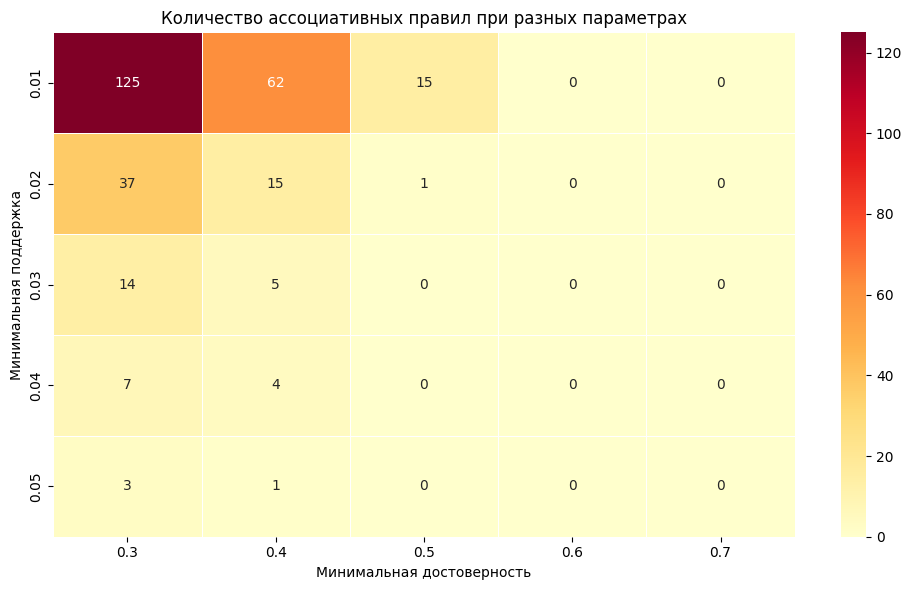


2. ВЛИЯНИЕ ПАРАМЕТРОВ НА СИЛУ СВЯЗЕЙ (ЛИФТ):


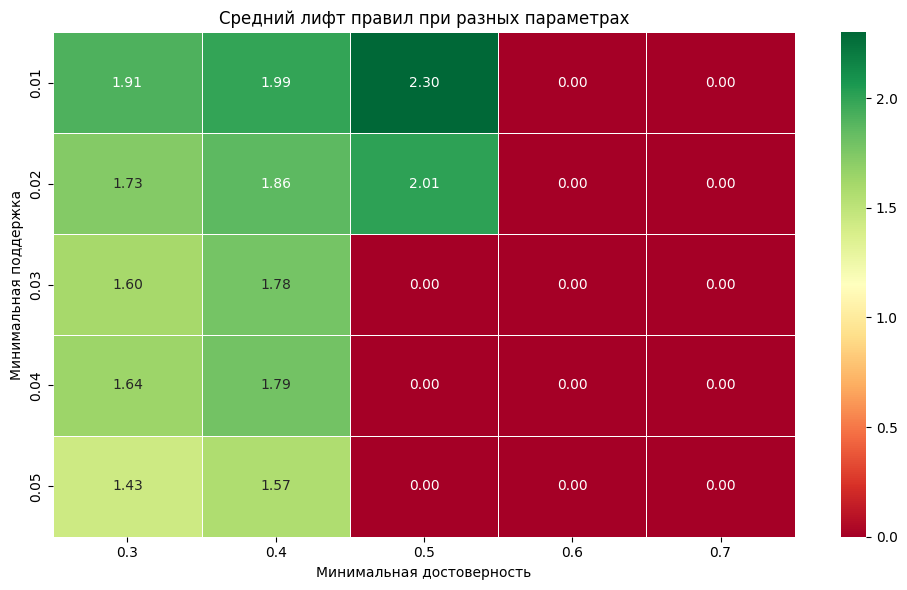


3. ЛУЧШИЕ КОМБИНАЦИИ ПАРАМЕТРОВ:
Топ-5 по количеству правил:
  Поддержка: 0.01, Достоверность: 0.30
  Правила: 125.0, Средний лифт: 1.91
  Поддержка: 0.01, Достоверность: 0.40
  Правила: 62.0, Средний лифт: 1.99
  Поддержка: 0.02, Достоверность: 0.30
  Правила: 37.0, Средний лифт: 1.73
  Поддержка: 0.01, Достоверность: 0.50
  Правила: 15.0, Средний лифт: 2.30
  Поддержка: 0.02, Достоверность: 0.40
  Правила: 15.0, Средний лифт: 1.86

Топ-5 по силе связей (лифт):
  Поддержка: 0.01, Достоверность: 0.50
  Правила: 15.0, Средний лифт: 2.30
  Поддержка: 0.02, Достоверность: 0.50
  Правила: 1.0, Средний лифт: 2.01
  Поддержка: 0.01, Достоверность: 0.40
  Правила: 62.0, Средний лифт: 1.99
  Поддержка: 0.01, Достоверность: 0.30
  Правила: 125.0, Средний лифт: 1.91
  Поддержка: 0.02, Достоверность: 0.40
  Правила: 15.0, Средний лифт: 1.86

4. АНАЛИЗ КОМПРОМИССОВ МЕЖДУ КОЛИЧЕСТВОМ И КАЧЕСТВОМ ПРАВИЛ:


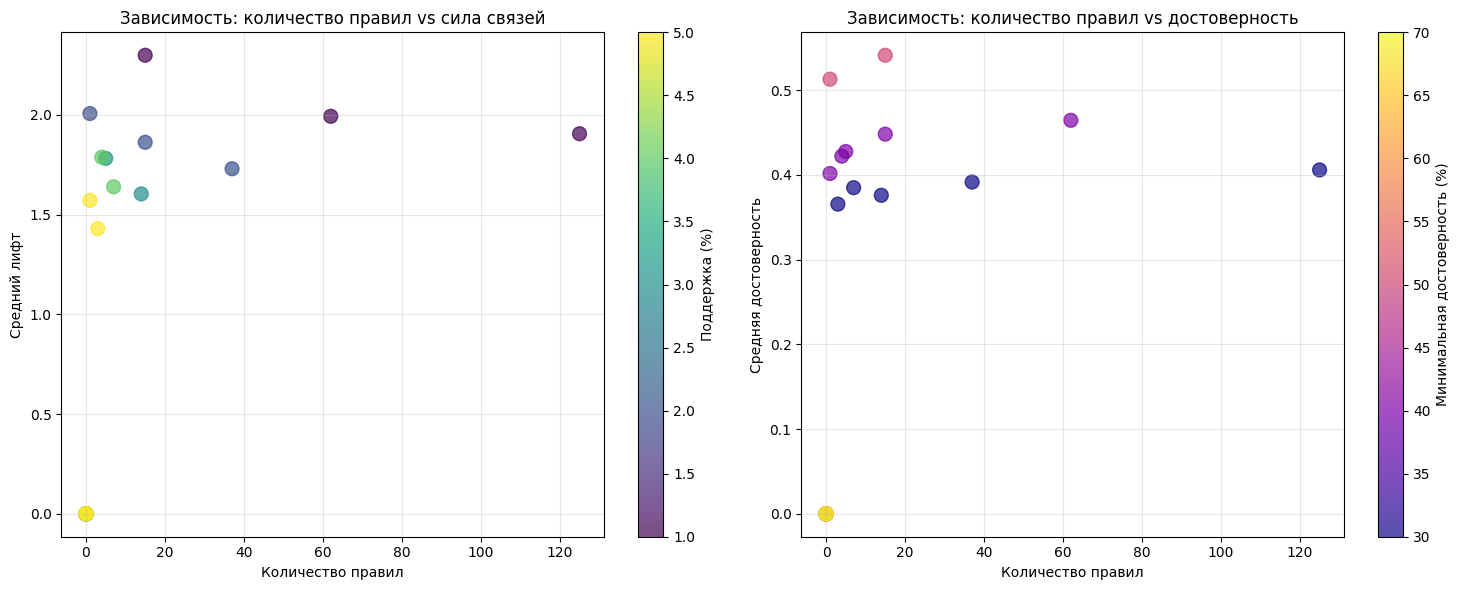

In [12]:
# Пункт 6: Эксперименты с разными параметрами поддержки и достоверности

print("="*70)
print("ПУНКТ 6: ЭКСПЕРИМЕНТЫ С РАЗНЫМИ ПАРАМЕТРАМИ")
print("="*70)

# Определяем диапазоны параметров для экспериментов
support_values = [0.01, 0.02, 0.03, 0.04, 0.05]
confidence_values = [0.3, 0.4, 0.5, 0.6, 0.7]

results = []

print("Проведение экспериментов с разными параметрами...")
print("Поддержка | Достоверность | Наборы | Правила | Средний лифт")

for sup in support_values:
    for conf in confidence_values:
        try:
            # Получаем частые наборы и правила
            frequent_itemsets = apriori(data, min_support=sup, use_colnames=True)
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
            
            # Собираем статистику
            avg_lift = rules['lift'].mean() if len(rules) > 0 else 0
            max_lift = rules['lift'].max() if len(rules) > 0 else 0
            avg_confidence = rules['confidence'].mean() if len(rules) > 0 else 0
            
            results.append({
                'support': sup,
                'confidence': conf,
                'frequent_itemsets': len(frequent_itemsets),
                'rules': len(rules),
                'avg_lift': avg_lift,
                'max_lift': max_lift,
                'avg_confidence': avg_confidence
            })
            
            print(f"   {sup:.2f}    |      {conf:.2f}      |  {len(frequent_itemsets):4d}  |   {len(rules):3d}   |    {avg_lift:.2f}")
            
        except MemoryError:
            print(f"   {sup:.2f}    |      {conf:.2f}      |  ----  |   ---   |    -- (Memory Error)")
            results.append({
                'support': sup,
                'confidence': conf,
                'frequent_itemsets': 0,
                'rules': 0,
                'avg_lift': 0,
                'max_lift': 0,
                'avg_confidence': 0
            })
            continue

# Создаем DataFrame для анализа
results_df = pd.DataFrame(results)

print("\n" + "="*70)
print("АНАЛИЗ РЕЗУЛЬТАТОВ ЭКСПЕРИМЕНТОВ")
print("="*70)

# Анализ влияния параметров на количество правил
print("\n1. ВЛИЯНИЕ ПАРАМЕТРОВ НА КОЛИЧЕСТВО ПРАВИЛ:")

# Создаем тепловую карту для количества правил
pivot_rules = results_df.pivot(index='support', columns='confidence', values='rules')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_rules, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Количество ассоциативных правил при разных параметрах')
plt.xlabel('Минимальная достоверность')
plt.ylabel('Минимальная поддержка')
plt.tight_layout()
plt.show()

# Анализ влияния на средний лифт
print("\n2. ВЛИЯНИЕ ПАРАМЕТРОВ НА СИЛУ СВЯЗЕЙ (ЛИФТ):")

pivot_lift = results_df.pivot(index='support', columns='confidence', values='avg_lift')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_lift, annot=True, fmt='.2f', cmap='RdYlGn', linewidths=0.5)
plt.title('Средний лифт правил при разных параметрах')
plt.xlabel('Минимальная достоверность')
plt.ylabel('Минимальная поддержка')
plt.tight_layout()
plt.show()

# Детальный анализ лучших комбинаций параметров
print("\n3. ЛУЧШИЕ КОМБИНАЦИИ ПАРАМЕТРОВ:")

# Находим комбинации с максимальным количеством правил
top_rules_combinations = results_df.nlargest(5, 'rules')[['support', 'confidence', 'rules', 'avg_lift']]
print("Топ-5 по количеству правил:")
for idx, row in top_rules_combinations.iterrows():
    print(f"  Поддержка: {row['support']:.2f}, Достоверность: {row['confidence']:.2f}")
    print(f"  Правила: {row['rules']}, Средний лифт: {row['avg_lift']:.2f}")

# Находим комбинации с максимальным средним лифтом
top_lift_combinations = results_df.nlargest(5, 'avg_lift')[['support', 'confidence', 'rules', 'avg_lift']]
print("\nТоп-5 по силе связей (лифт):")
for idx, row in top_lift_combinations.iterrows():
    print(f"  Поддержка: {row['support']:.2f}, Достоверность: {row['confidence']:.2f}")
    print(f"  Правила: {row['rules']}, Средний лифт: {row['avg_lift']:.2f}")

# Анализ компромиссов
print("\n4. АНАЛИЗ КОМПРОМИССОВ МЕЖДУ КОЛИЧЕСТВОМ И КАЧЕСТВОМ ПРАВИЛ:")

# График зависимости количества правил от их качества
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Количество правил vs Средний лифт
scatter1 = ax1.scatter(results_df['rules'], results_df['avg_lift'], 
                      c=results_df['support']*100, s=100, alpha=0.7, cmap='viridis')
ax1.set_xlabel('Количество правил')
ax1.set_ylabel('Средний лифт')
ax1.set_title('Зависимость: количество правил vs сила связей')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Поддержка (%)')

# Количество правил vs Средняя достоверность
scatter2 = ax2.scatter(results_df['rules'], results_df['avg_confidence'], 
                      c=results_df['confidence']*100, s=100, alpha=0.7, cmap='plasma')
ax2.set_xlabel('Количество правил')
ax2.set_ylabel('Средняя достоверность')
ax2.set_title('Зависимость: количество правил vs достоверность')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='Минимальная достоверность (%)')

plt.tight_layout()
plt.show()


ПУНКТ 7: ВИЗУАЛИЗАЦИЯ ГРАФА АССОЦИАТИВНЫХ ПРАВИЛ
Используем параметры: поддержка=0.02, достоверность=0.4
Количество правил для визуализации: 15

Правила для визуализации графа:
  beef -> whole milk
    (поддержка: 0.021, достоверность: 0.405, лифт: 1.585)
  butter -> whole milk
    (поддержка: 0.028, достоверность: 0.497, лифт: 1.946)
  curd -> whole milk
    (поддержка: 0.026, достоверность: 0.490, лифт: 1.919)
  domestic eggs -> whole milk
    (поддержка: 0.030, достоверность: 0.473, лифт: 1.850)
  frozen vegetables -> whole milk
    (поддержка: 0.020, достоверность: 0.425, лифт: 1.663)
  margarine -> whole milk
    (поддержка: 0.024, достоверность: 0.413, лифт: 1.617)
  root vegetables -> other vegetables
    (поддержка: 0.047, достоверность: 0.435, лифт: 2.247)
  whipped/sour cream -> other vegetables
    (поддержка: 0.029, достоверность: 0.403, лифт: 2.082)
  root vegetables -> whole milk
    (поддержка: 0.049, достоверность: 0.449, лифт: 1.756)
  tropical fruit -> whole milk
    

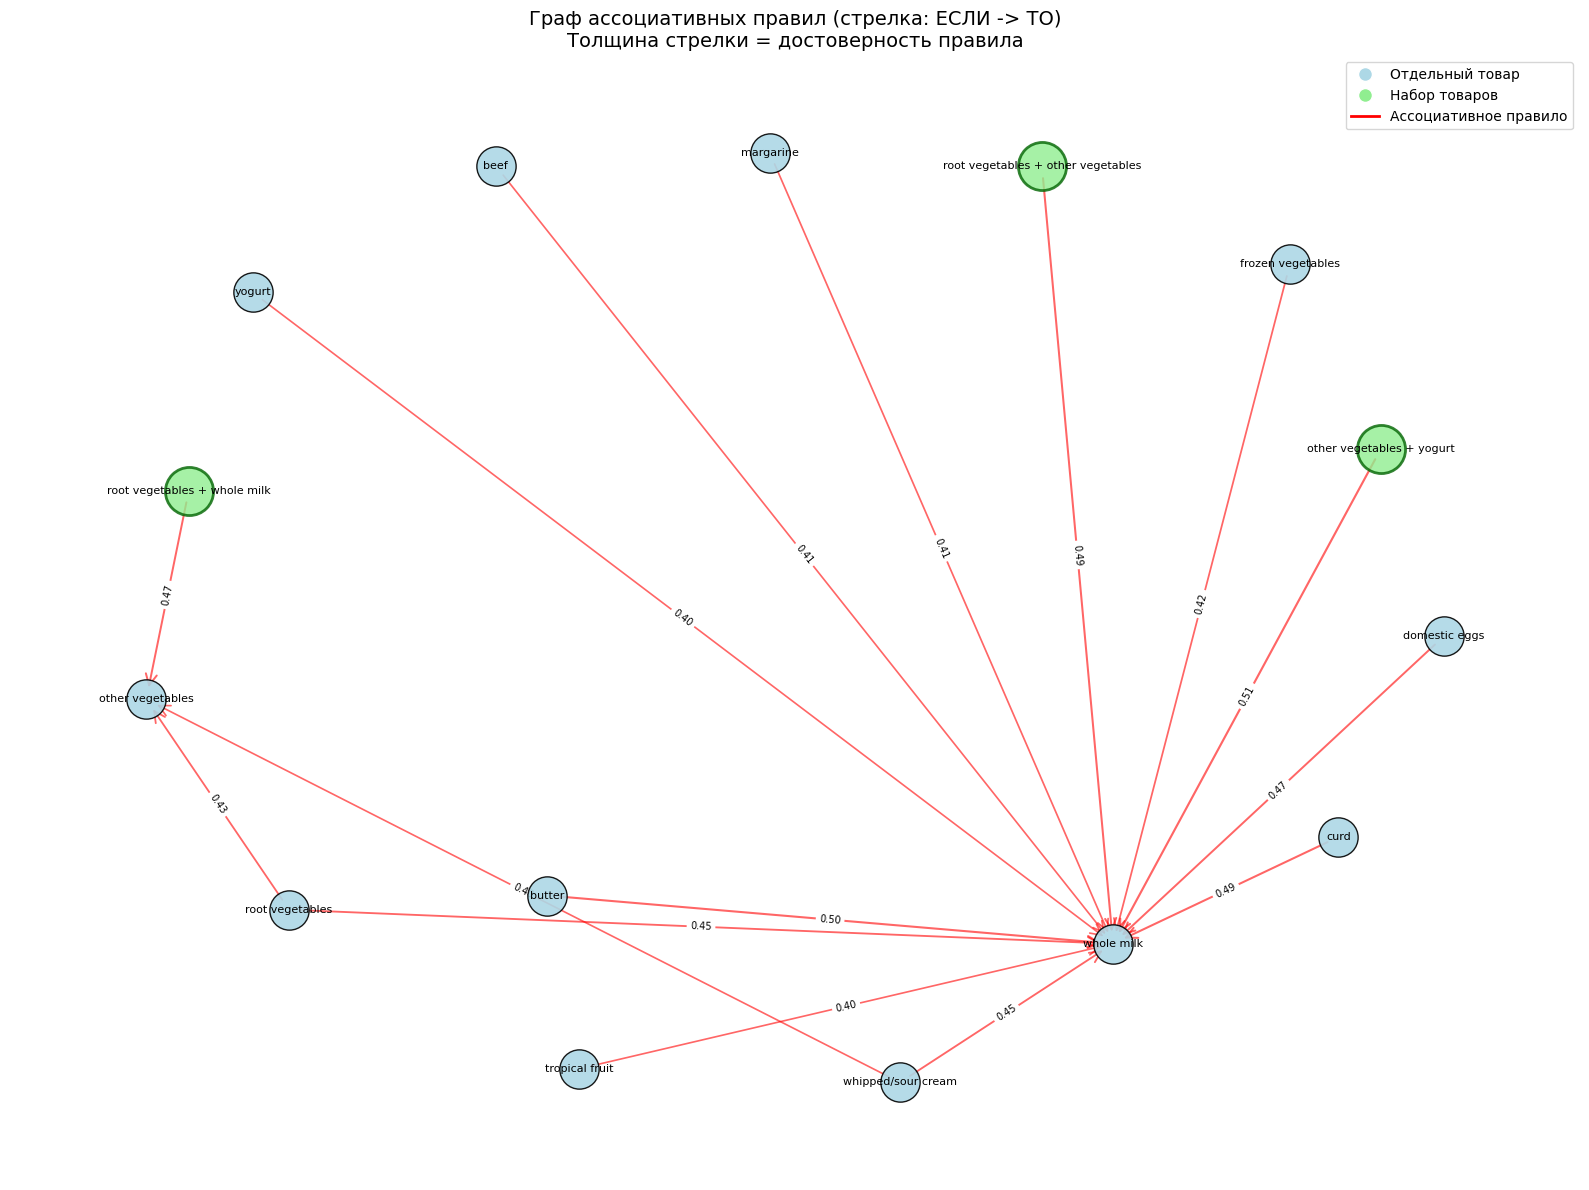


АНАЛИЗ ГРАФА АССОЦИАТИВНЫХ ПРАВИЛ
Общая статистика графа:
  - Всего узлов: 15
  - Всего ребер: 15
  - Узлы-товары: 12
  - Узлы-наборы: 3

Анализ центральности узлов:
Топ-5 узлов по степени центральности:
  whole milk (товар): 0.857
  other vegetables (товар): 0.214
  root vegetables (товар): 0.143
  whipped/sour cream (товар): 0.143
  beef (товар): 0.071

Анализ направленных связей:
Чаще всего покупаются ВМЕСТЕ с другими товарами:
  whole milk: 12 раз
  other vegetables: 3 раз
Чаще всего ВЛИЯЮТ на покупку других товаров:
  root vegetables: 4 раз
  whipped/sour cream: 2 раз
  yogurt: 2 раз

Анализ кластеров и сообществ:
Количество связных компонент: 1
Размеры компонент связности: [12]
Самая большая компонента: 12 товаров
Плотность графа: 0.182

ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
1. Граф показывает направленные связи между товарами
2. Толстые стрелки = высокодостоверные правила
3. Центральные узлы = популярные товары, влияющие на другие покупки
4. Изолированные узлы = товары с уникальными патте

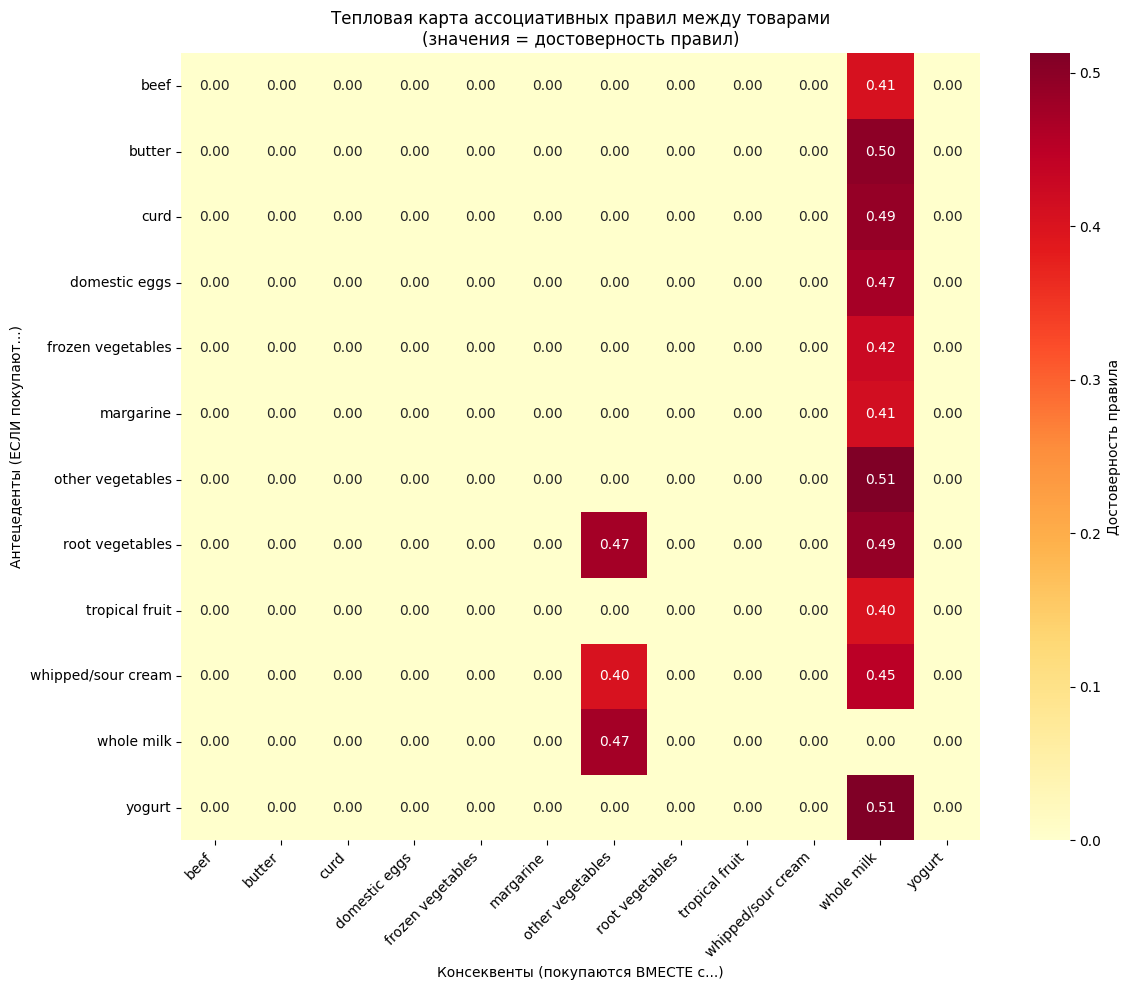

Интерпретация тепловой карты:
- Строки: товары, которые покупают первыми (антецеденты)
- Столбцы: товары, которые покупают вместе с ними (консеквенты)
- Яркие ячейки: сильные ассоциативные связи
- Диагональ: не используется (товар не может быть ассоциирован с самим собой)


In [13]:
# Пункт 7: Визуализация графа ассоциативных правил

print("="*70)
print("ПУНКТ 7: ВИЗУАЛИЗАЦИЯ ГРАФА АССОЦИАТИВНЫХ ПРАВИЛ")
print("="*70)

# Используем оптимальные параметры для построения графа
print("Используем параметры: поддержка=0.02, достоверность=0.4")
print(f"Количество правил для визуализации: {len(optimal_rules)}")

if len(optimal_rules) > 0:
    # Подготовка данных для графа
    rules_for_graph = optimal_rules.copy()
    
    # Преобразуем frozenset в строки для удобства
    rules_for_graph['antecedents_str'] = rules_for_graph['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules_for_graph['consequents_str'] = rules_for_graph['consequents'].apply(lambda x: ', '.join(list(x)))
    
    print("\nПравила для визуализации графа:")
    for i, row in rules_for_graph.iterrows():
        print(f"  {row['antecedents_str']} -> {row['consequents_str']}")
        print(f"    (поддержка: {row['support']:.3f}, достоверность: {row['confidence']:.3f}, лифт: {row['lift']:.3f})")
    
    # Создаем граф
    G = nx.DiGraph()  # Используем ориентированный граф для правил "если -> то"
    
    # Добавляем узлы и ребра
    all_products = set()
    
    for _, rule in rules_for_graph.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        
        # Добавляем все товары как узлы
        for product in antecedents + consequents:
            all_products.add(product)
            G.add_node(product, type='product')
        
        # Создаем ребро от антецедента к консеквенту
        # Для множественных антецедентов создаем отдельный узел-набор
        if len(antecedents) > 1:
            antecedent_node = " + ".join(antecedents)
            G.add_node(antecedent_node, type='itemset')
            G.add_edge(antecedent_node, consequents[0], 
                      weight=rule['confidence'], 
                      support=rule['support'],
                      lift=rule['lift'])
        else:
            G.add_edge(antecedents[0], consequents[0], 
                      weight=rule['confidence'], 
                      support=rule['support'],
                      lift=rule['lift'])
    
    # Визуализация графа
    plt.figure(figsize=(16, 12))
    
    # Используем spring layout для автоматического расположения
    pos = nx.spring_layout(G, k=3, iterations=50)
    
    # Разделяем узлы по типам для разного оформления
    product_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'product']
    itemset_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'itemset']
    
    # Рисуем узлы товаров
    nx.draw_networkx_nodes(G, pos, nodelist=product_nodes, 
                          node_size=800, node_color='lightblue', 
                          alpha=0.9, edgecolors='black')
    
    # Рисуем узлы наборов товаров
    if itemset_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=itemset_nodes, 
                              node_size=1200, node_color='lightgreen', 
                              alpha=0.8, edgecolors='darkgreen', linewidths=2)
    
    # Рисуем ребра с толщиной пропорциональной достоверности
    edges = G.edges()
    weights = [G[u][v]['weight'] * 3 for u, v in edges]  # Масштабируем для видимости
    
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, 
                          alpha=0.6, edge_color='red', arrows=True, 
                          arrowsize=20, arrowstyle='->')
    
    # Подписи узлов
    nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
    
    # Легенда для ребер (веса = достоверность)
    edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" 
                   for u, v in edges if G[u][v]['weight'] > 0.4}
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                                font_size=7, label_pos=0.5)
    
    plt.title('Граф ассоциативных правил (стрелка: ЕСЛИ -> ТО)\n'
             'Толщина стрелки = достоверность правила', fontsize=14)
    plt.axis('off')
    
    # Добавляем легенду
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', 
                  markersize=10, label='Отдельный товар'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', 
                  markersize=10, label='Набор товаров'),
        plt.Line2D([0], [0], color='red', linewidth=2, label='Ассоциативное правило')
    ]
    
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Анализ графа
    print("\n" + "="*70)
    print("АНАЛИЗ ГРАФА АССОЦИАТИВНЫХ ПРАВИЛ")
    print("="*70)
    
    print(f"Общая статистика графа:")
    print(f"  - Всего узлов: {G.number_of_nodes()}")
    print(f"  - Всего ребер: {G.number_of_edges()}")
    print(f"  - Узлы-товары: {len(product_nodes)}")
    print(f"  - Узлы-наборы: {len(itemset_nodes)}")
    
    # Анализ центральности
    print(f"\nАнализ центральности узлов:")
    
    # Степень центральности
    degree_centrality = nx.degree_centrality(G)
    top_central = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    
    print("Топ-5 узлов по степени центральности:")
    for node, centrality in top_central:
        node_type = "набор" if node in itemset_nodes else "товар"
        print(f"  {node} ({node_type}): {centrality:.3f}")
    
    # Анализ входящих и исходящих связей
    print(f"\nАнализ направленных связей:")
    
    # Товары, которые чаще всего являются целью (консеквентами)
    consequent_count = {}
    for _, rule in rules_for_graph.iterrows():
        consequents = list(rule['consequents'])
        for consequent in consequents:
            consequent_count[consequent] = consequent_count.get(consequent, 0) + 1
    
    top_consequents = sorted(consequent_count.items(), key=lambda x: x[1], reverse=True)[:3]
    print("Чаще всего покупаются ВМЕСТЕ с другими товарами:")
    for product, count in top_consequents:
        print(f"  {product}: {count} раз")
    
    # Товары, которые чаще всего являются причиной (антецедентами)
    antecedent_count = {}
    for _, rule in rules_for_graph.iterrows():
        antecedents = list(rule['antecedents'])
        for antecedent in antecedents:
            antecedent_count[antecedent] = antecedent_count.get(antecedent, 0) + 1
    
    top_antecedents = sorted(antecedent_count.items(), key=lambda x: x[1], reverse=True)[:3]
    print("Чаще всего ВЛИЯЮТ на покупку других товаров:")
    for product, count in top_antecedents:
        print(f"  {product}: {count} раз")
    
    # Поиск кластеров в графе
    print(f"\nАнализ кластеров и сообществ:")
    
    # Преобразуем в неориентированный граф для анализа сообществ
    G_undirected = G.to_undirected()
    
    # Удаляем узлы-наборы для упрощения анализа
    G_simple = G_undirected.subgraph(product_nodes)
    
    if len(G_simple.nodes()) > 0:
        # Анализ связности
        connected_components = list(nx.connected_components(G_simple))
        print(f"Количество связных компонент: {len(connected_components)}")
        
        # Размеры компонент связности
        component_sizes = [len(comp) for comp in connected_components]
        print(f"Размеры компонент связности: {component_sizes}")
        
        # Самая большая компонента связности
        largest_component = max(connected_components, key=len)
        print(f"Самая большая компонента: {len(largest_component)} товаров")
        
        # Плотность графа
        density = nx.density(G_simple)
        print(f"Плотность графа: {density:.3f}")
        
        print("\nИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
        print("1. Граф показывает направленные связи между товарами")
        print("2. Толстые стрелки = высокодостоверные правила")
        print("3. Центральные узлы = популярные товары, влияющие на другие покупки")
        print("4. Изолированные узлы = товары с уникальными паттернами покупок")
        print("5. Кластеры = группы товаров, часто покупаемых вместе")
        
else:
    print("Недостаточно правил для построения графа")

# Альтернативная визуализация: тепловая карта связей между товарами
print("\n" + "="*70)
print("АЛЬТЕРНАТИВНАЯ ВИЗУАЛИЗАЦИЯ: ТЕПЛОВАЯ КАРТА СВЯЗЕЙ")
print("="*70)

# Создаем матрицу связей между товарами
if len(optimal_rules) > 0:
    # Собираем все уникальные товары из правил
    all_products_in_rules = set()
    for _, rule in optimal_rules.iterrows():
        all_products_in_rules.update(rule['antecedents'])
        all_products_in_rules.update(rule['consequents'])
    
    all_products_list = sorted(list(all_products_in_rules))
    
    # Создаем матрицу связей (достоверность)
    connection_matrix = pd.DataFrame(0.0, index=all_products_list, columns=all_products_list)
    
    for _, rule in optimal_rules.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        
        for ant in antecedents:
            for cons in consequents:
                connection_matrix.loc[ant, cons] = rule['confidence']
    
    # Визуализация тепловой карты
    plt.figure(figsize=(12, 10))
    sns.heatmap(connection_matrix, annot=True, fmt='.2f', cmap='YlOrRd', 
                cbar_kws={'label': 'Достоверность правила'})
    plt.title('Тепловая карта ассоциативных правил между товарами\n(значения = достоверность правил)')
    plt.xlabel('Консеквенты (покупаются ВМЕСТЕ с...)')
    plt.ylabel('Антецеденты (ЕСЛИ покупают...)')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    print("Интерпретация тепловой карты:")
    print("- Строки: товары, которые покупают первыми (антецеденты)")
    print("- Столбцы: товары, которые покупают вместе с ними (консеквенты)")
    print("- Яркие ячейки: сильные ассоциативные связи")
    print("- Диагональ: не используется (товар не может быть ассоциирован с самим собой)")